### 해석
- N이 1일때 주의해야할듯

### 접근
- 두 영역을 커버할 수 있는 배치를 최대한 많이 두고, 2N - (두 영역을 커버할 수 있는 배치의 수)를 출력하면 될 것 같은데.
- 각 칸마다 위(-1), 좌(-1), 우(+1)를 살펴보면서 두 영역을 커버할 수 있는 배치가 있는지 확인해보고, 그 가능여부를 DP에 저장한다는 아이디어가 먼저 생각났다.
  - 직접 구현을 먼저 해보는편이 좋아보인다.



In [ ]:
import io, os
input=io.BytesIO(os.read(0,os.fstat(0).st_size)).readline

def sol() :
  N, W = map(int, input().split())
  L = [[*map(int, input().split())], [*map(int, input().split())]]
  DP = [[[0] * 3 for _ in range(N)] for _ in range(2)] #좌, 우, 하
  for x, l in enumerate(L) :
    for y, v in enumerate(l) :
      for i, (dx, dy) in enumerate([(0, 1), (0, -1), (1, 0)]) :
        nx = (x + dx) % 2
        ny = (y + dy) % N
        if v + L[nx][ny] <= W :
          DP[x][y][i] = 1
  pprint(DP)
        
for _ in range(int(input())) :
  sol()

### 아이디어2
- DP[i][dir]: 현재(i) 칸에서 상/하/좌/우(dir)와 합칠 수 있으면 합쳤을 때 필요한 최소 부대원 수

### 풀이
- 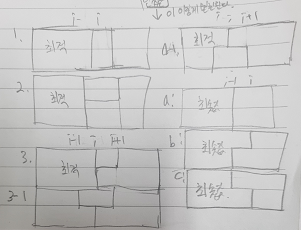
- (모델링) 최적 부분 문제의 고려 범위는 어떻게 되어야 할까? `인접한` 칸을 볼 수 있으며, 왼쪽에서 오른쪽으로 채워나간다고 한다면 오른쪽을 보는 경우를 고려하지 않는다고 했을 때 \
그림과 같은 범위에서 최적 부분 문제가 고려된다.
  - 즉 최근 2칸의 정보만을 고려하면 된다.
- 따라서 DP는 3개로 정의할 수 있다.
  - `a[i]`: 1행과 2행 모두 `i - 1`열까지 채우는데 필요한 최솟값
  - `b[i]`: 1행은 `i`열, 2행은 `i - 1`열까지 채우는데 필요한 최솟값
  - `c[i]`: 1행은 `i - 1`열, 2행은 `i`열까지 채우는데 필요한 최솟값
- DP를 채우는 방법은 총 4가지가 있다. 현재까지 최적으로 채웠고, 그 다음열을 어떻게 채우는지 고려하는 방향으로 구현한다고 했을 때 ($x_{i+1} := \text {optimal candidate}$)
  1. 1행과 2행을 모두 `i-1`열까지 채우고 `i`칸의 위아래를 소대 하나로 채우는 경우
      - (기저) `b`로 채우고 아래칸에 한개의 소대를 채우거나, `c`로 채우고 윗칸에 한개의 소대를 채우는 것과 비교해서,
        - $a_{i+1} := \min(b_i + 1, c_i + 1)$
      - 두 구역을 합쳐야 하므로 각 구역의 적의 수가 $W$ 를 넘지 않아야 한다.
        - $\text {if } (l_1, i) + (l_2, i) \le W$
      - `i` 번째 칸의 위아랫칸을 한개의 소대를 채운다.
        - $a_{i+1} := \min(a_{i+1}, a_i + 1)$
  2. 1행과 2행 모두 `i-2` 열까지 채우고, `i-1`, `i`열에 대해 1행에 한 소대, 2행의 한소대를 채우는 경우
      - (기저) 1번과 같은 DP를 채우기 때문에 위의 $a_{i+1}$ 을 그대로 유지한채로,
      - 좌우로 두 개의 칸을 살펴보기 때문에 i가 0이면 안된다
        - $\text {if } i > 0$
      - 한 소대로 채우는 두 곳 각각 적의 수가 `W`를 넘지 않아야 한다.
        - $\text {if } (l_1, i-1) + (l_1, i) \le W$
        - $\text {if } (l_2, i-1) + (l_2, i) \le W$
      - 두 구역을 각각 한개의 소대로 채운다. $a_{i-1}$ 에서 +2하는 것에 주의
        - $a_{i+1} := \min(a_{i+1}, a_{i-1} + 2)$
  3. (b 모양을 만들기 위해)1행을 `i-1`열, 2행을 `i`열까지 채우고 1행의 좌우를 소대 하나로 채우는 경우 
      - (기저) a로 채우고 1행의 `i+1`열에 소대 하나를 채우는 것과 비교해서,
        - $b_{i+1} := a_{i+1} + 1$
      - 합칠 구역의 적의 수가 $W$ 를 넘지 않아야 한다.
        - $\text {if } (l_1, i) + (l_1, i+1) \le W$
      - c 모양의 배치에서 1개의 합친 소대를 채운다.
        - $b_{i+1} = \min(b_{i+1}, c_i + 1)$
  4. (c 모양을 만들기 위해)1행을 `i`열, 2행을 `i-1`열까지 채우고 2행의 좌우를 소대 하나로 채우는 경우
      - (기저) a로 채우고 2행의 `i+1`열에 소대 하나를 채우는 것과 비교해서,
        - $c_{i+1} := a_{i+1} + 1$
      - 합칠 구역의 적의 수가 $W$ 를 넘지 않아야 한다.
        - $\text {if } (l_2, i) + (l_2, i+1) \le W$
      - b 모양의 배치에서 1개의 합친 소대를 채운다.
        - $c_{i+1} = \min(c_{i+1}, b_i + 1)$

- 초기 조건은 다음과 같다.
  - $a_0$ 은 -1 열을 채우는 방법은 존재하지 않는다고 가정할 수 있으므로 0이다.
    - `a[0] = 0`
  - $b_0$ 과 $c_0$ 은 각각 0번째 열을 1개씩은 채워놔야 하므로 1이다.
    - 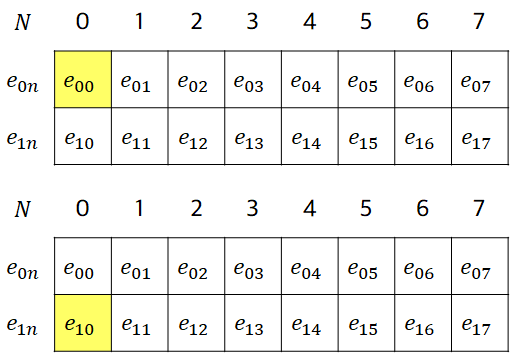
    - `b[0] = c[0] = 1`
  - 마지막이 a 모양으로 됐을 때에 모든 경우를 고려했다고 볼 수 있으므로, `a[N-1]`이 답이 된다.
- 원형으로 채우는 것을 고려하기 위해 `0`열과 마지막(`N-1`)열끼리 합치는 세가지 경우를 고려해야 한다. (이러니까 P3이지 ㅅㅂ)
  - 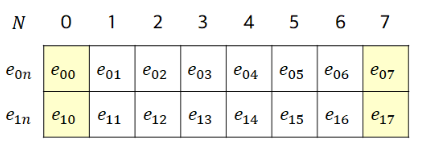
  - 우선 원형으로 배치된다는 것은 `0`열과 `N-1`열끼리의 둘 중 하나를 소대 하나로 채우는 경우들을 고려한다는 의미이다. 
    - 각각의 경우에 대해서 각각의 소대가 이미 점령한 것으로 처리하고, 0번째 칸을 제외시키는 방법으로 생각한다면
      dp를 1부터 돌리는 방법으로 구현할 수 있다. 그리고 각 case에 대해서 초기상태를 고려한다.
      - 또한 이 DP를 1부터 돌리므로, 이 경우를 고려하기 위해선 `N > 1` 이라는 조건도 들어가야 한다.
  1. 윗줄을 걸쳐서 합치는 경우
      - a모양을 만들기 위해선 적어도 한 소대가 2열 0칸을 한소대로 채워야 한다.
        - 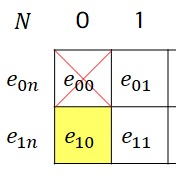
        - 따라서 `a[1] = 1`이 된다.
      - b 모양을 만들기 위해선 적어도 두 팀이 각각 1열 1행, 2열 0행을 채워야 한다.
        - 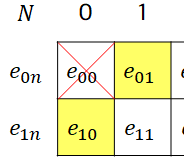
        - 따라서 `b[1] = 2`가 된다.
      - c 모양을 만들기 위해선 2열 0행과 1행을 합칠 수 있는지 여부를 생각해서 고려해야 한다.  
        - 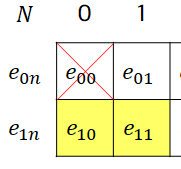
        - 노란색 부분을 합칠 수 있다면 한 팀, 그럴 수 없다면 두 팀을 써야 한다. 
        - 따라서 `c[1] = 1 if L[0][1] + L[1][1] <= W else 2`가 된다.
      - 1열 `N-1`행의 칸을 제외했으므로, a 모양에서 답을 내면 안된다(1행 N-1열이 중복 계산될 것이다)
        - 따라서 2행이 돌출한 모양인 c 모양에서 답을 내야한다.
        - 그리고 초기상태에서 합치기로 고려했던 소대 한 팀을 더해준다.
        - `c[N-1] + 1`이 답이 된다.
    2. 아랫줄을 걸쳐서 합치는 경우
        - 기본적으로 위와 같은 방식으로 생각하면 된다.
        - a의 모양은 완전히 동일하므로 그대로 두고, b와 c의 경우는 1행과 2행에 대한 처리를 반대로 한다.
        - 답은 b에 있을 것이고 `b[N-1] + 1`이 답이 된다.
    3. 양쪽 줄을 모두 걸쳐서 합치는 경우
        - 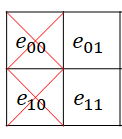
        - 선형으로 고려할 때와 모양이 같다. 그렇다면 선형으로 고려하되, 합칠 수 있는 수의 카운트만 잘 세주면 된다는 의미이다.
        - 따라서 `a[1] = 0, b[1] = c[1] = 1'`이 되며 정답은 a모양에, 두 소대를 합쳤으므로 2를 더해 `a[N-1] + 2`가 정답이 된다.

In [ ]:
import io, os, sys
input=io.BytesIO(os.read(0,os.fstat(0).st_size)).readline

def sol():
  def dp(s) :
    for i in range(s, N) :
      a[i+1] = min(b[i] + 1, c[i] + 1)
      if L[i][0] + L[i][1] <= W : #위아래로 합칠 수 있으면
        a[i+1] = min(a[i+1], a[i] + 1)
      if i > 0 and L[i-1][0] + L[i][0] <= W and L[i-1][1] + L[i][1] <= W : #윗줄과 아랫줄을 각각 좌우로 합칠 수 있으면
        a[i+1] = min(a[i+1], a[i-1] + 2)
      if (i < N-1) :
        b[i+1] = a[i+1] + 1 #a모양으로 채우고 윗칸을 한개의 소대로 채우는 것과 비교해서,
        if L[i][0] + L[i+1][0] <= W : #c모양에서 윗칸의 좌우를 합칠 수 있으면
          b[i+1] = min(b[i+1], c[i] + 1)
        c[i+1] = a[i+1] + 1 #a모양으로 채우고 아랫칸 ~
        if L[i][1] + L[i+1][1] <= W :
          c[i+1] = min(c[i+1], b[i] + 1)

  N, W = map(int, input().split())
  # L = [[*map(int, input().split())], [*map(int, input().split())]]
  L1 = [*map(int, input().split())]
  L2 = [*map(int, input().split())]
  L = [(l1, l2) for l1, l2 in zip(L1, L2)]

  ans = float('inf')
  a = [0] * (N+1)
  b = [0] * N
  c = [0] * N

  #원형으로 맞닿은 부분끼리 걸쳐서 합치는 경우를 제외한 DP
  b[0] = c[0] = 1
  dp(0)
  ans = min(ans, a[N])

  if N > 1 and L[0][0] + L[N-1][0] <= W : #걸치기 위해선 N이 1을 넘어야 한다 + 윗줄의 0번째 칸과 마지막 칸을 합칠 수 있으면
    a[1] = 1
    b[1] = 2
    c[1] = 1 if L[0][1] + L[1][1] <= W else 2 #밑칸을 합칠 수 있는지를 초기값을 계산할 때 확인한다.
    # dp(1) 합칠 부분을 제외하고 계산하는 방법이다. 그렇기에 초기값을 그에 맞게 설정한다.
    dp(1) 
    ans = min(ans, c[N-1] + 1) #제외시킨 칸에 대한 카운트로 +1을 해준다.

  if N > 1 and L[0][1] + L[N-1][1] <= W : 
    a[1] = 1
    b[1] = 1 if L[0][0] + L[1][0] <= W else 2
    c[1] = 2
    dp(1)
    ans = min(ans, b[N-1] + 1)

  if N > 1 and L[0][0] + L[N-1][0] <= W and L[0][1] + L[N-1][1] <= W : #양쪽 줄의 0번째 칸과 마지막 칸을 좌우로 합칠 수 있으면
    a[1] = 0
    b[1] = c[1] = 1
    dp(1)
    ans = min(ans, a[N-1] + 2)

  sys.stdout.write(str(ans) + '\n')

for _ in range(int(input())):
  sol()

- 풀이가 길어져서 풀이의 핵심을 더 정리한다.

### 풀이 정리
- 두 칸 높이의 격자에서 인접한 칸을 합치는 경우에 대한 DP 모델링
  - 현재 칸에서 상/하/좌/우로 합칠 수 있는 경우를 고려한다 x
    - 이 부분은 그리디한 생각에 조금더 가까운것 같다. 모든 경우를 고려하는 방법으로 고민해야겠다.
  - 합치는 모든 경우를 고려했을 때, 계속 반복될 수 있는건 마지막 두 칸일 것이다. 어떻게 합치고, 어떻게 합쳐왔던, 이 두 칸의 모양이 어떨지에 대해 고려해야 한다.
    - 따라서 마지막 두칸의 모양에 따른 `a, b, c`의 DP가 나올 수 있던 것이다.
- DP의 기저상태 고려
  - DP를 얼마나 잘 설계했는지가 가장 중요한 것 같다.  
  - 다른 DP문제와 다르게 이 부분은 설계에 따라서 기저상태가 달라질 수 있기 때문에 설계한 DP의 의미를 잘 생각해야 한다.
- 환형에 대한 고려
  - 우선 선형으로 문제를 생각한 뒤, 환형에 대한 처리를 따로 한다.
    - 이는 처음과 끝을 제외하면 선형과 환형의 처리방법이 같기 때문이다.
  - 처음 문제에 접근했을 때 환형 처리에 대해서 너무 간과했던거 같다. 처음과 끝이 맞닿는 곳에 대한 처리를 모두 고려해야 한다.

### 여담
- `-1 행을 고려하지 않는다`고 표현한 것에서 뭔가 의미심장한 기분을 느꼈다.
  - DP의 초기 상태이니까 -1은 고려하지 않는 것은 당연한데, 만약 그게 아니라면 음수 행에 대한 고려를 할 수도 있다고 본다. 상대적인 위치라고 보면 되니까.
  - 그렇다면 팩토리얼 확장격인 감마함수가 실수로 오면서 함수 값에 대한 의미가 달라지게 된 것처럼, 의미가 다르게 확장된다.
    - 음수는 일종의 `과거`를 의미한다고 볼 수 있다. 우리가 무엇을 이산적으로 셀 때 +1 만큼 고려했다면, -1은 과거를 고려하는 것과 같다.
    - 그렇다면 유리수를 고려한다는 것은 뭘까? `1번` 이라는 정량적인 개념이 아니다. 무슨 의미일까?